## Group No: 44

## Group Member Names:
1. VEMULA VASUDEVUDU (2021SC04939)
2.PANKAJ CHOUDHARY (2021SC04114)
3.ANANT KUMAR JAIN (2021SC04989)
4.TARUN GUPTA (2021SC04941)

# 1. Import the required libraries

In [ ]:
##---------Type the code below this line------------------##
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import sys
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout

# 2. Data Acquisition  -- Score: 0.5 Mark

For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Code for converting the above downloaded data into a form suitable for DL



#Connecitng & loading dataset using tfds

In [ ]:
tfds.list_builders() # Checking the availbale datasets in tensorflow

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar100_n',
 'cifar10_1',
 'cifar10_corrupted',
 'cifar10_n',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'conll2002',
 'conll2003',
 'controlled_noisy_web_labels'

In [ ]:
#Import and Load the dataset uisng tfds
#ds, info= tfds.load('tf_flowers', split='train', shuffle_files=True, with_info=True)
#print(ds)

(train_set, test_set), info = tfds.load( 'tf_flowers', split=['train[:80%]', 'train[80%:]'],shuffle_files=True, with_info=True, as_supervised=True )


Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [ ]:
#print the information provided for the dataset by Tensorflow using the print
print(info)

tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_path='/root/tensorflow_datasets/tf_flowers/3.0.1.incomplete3ZTQ5D',
    file_format=tfrecord,
    download_size=218.21 MiB,
    dataset_size=221.83 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=3670, num_shards=2>,
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
)


In [ ]:
#Training and test set sizes
print("Training Set Size: %d" % train_set.cardinality().numpy())
print("Test Set Size: %d" % test_set.cardinality().numpy())

Training Set Size: 2936
Test Set Size: 734


In [ ]:
#number of classes
nclasses = info.features['label'].num_classes
print("Number of Classes: %d" % nclasses)


Number of Classes: 5


In [ ]:
print(info.features['label'].names)

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']


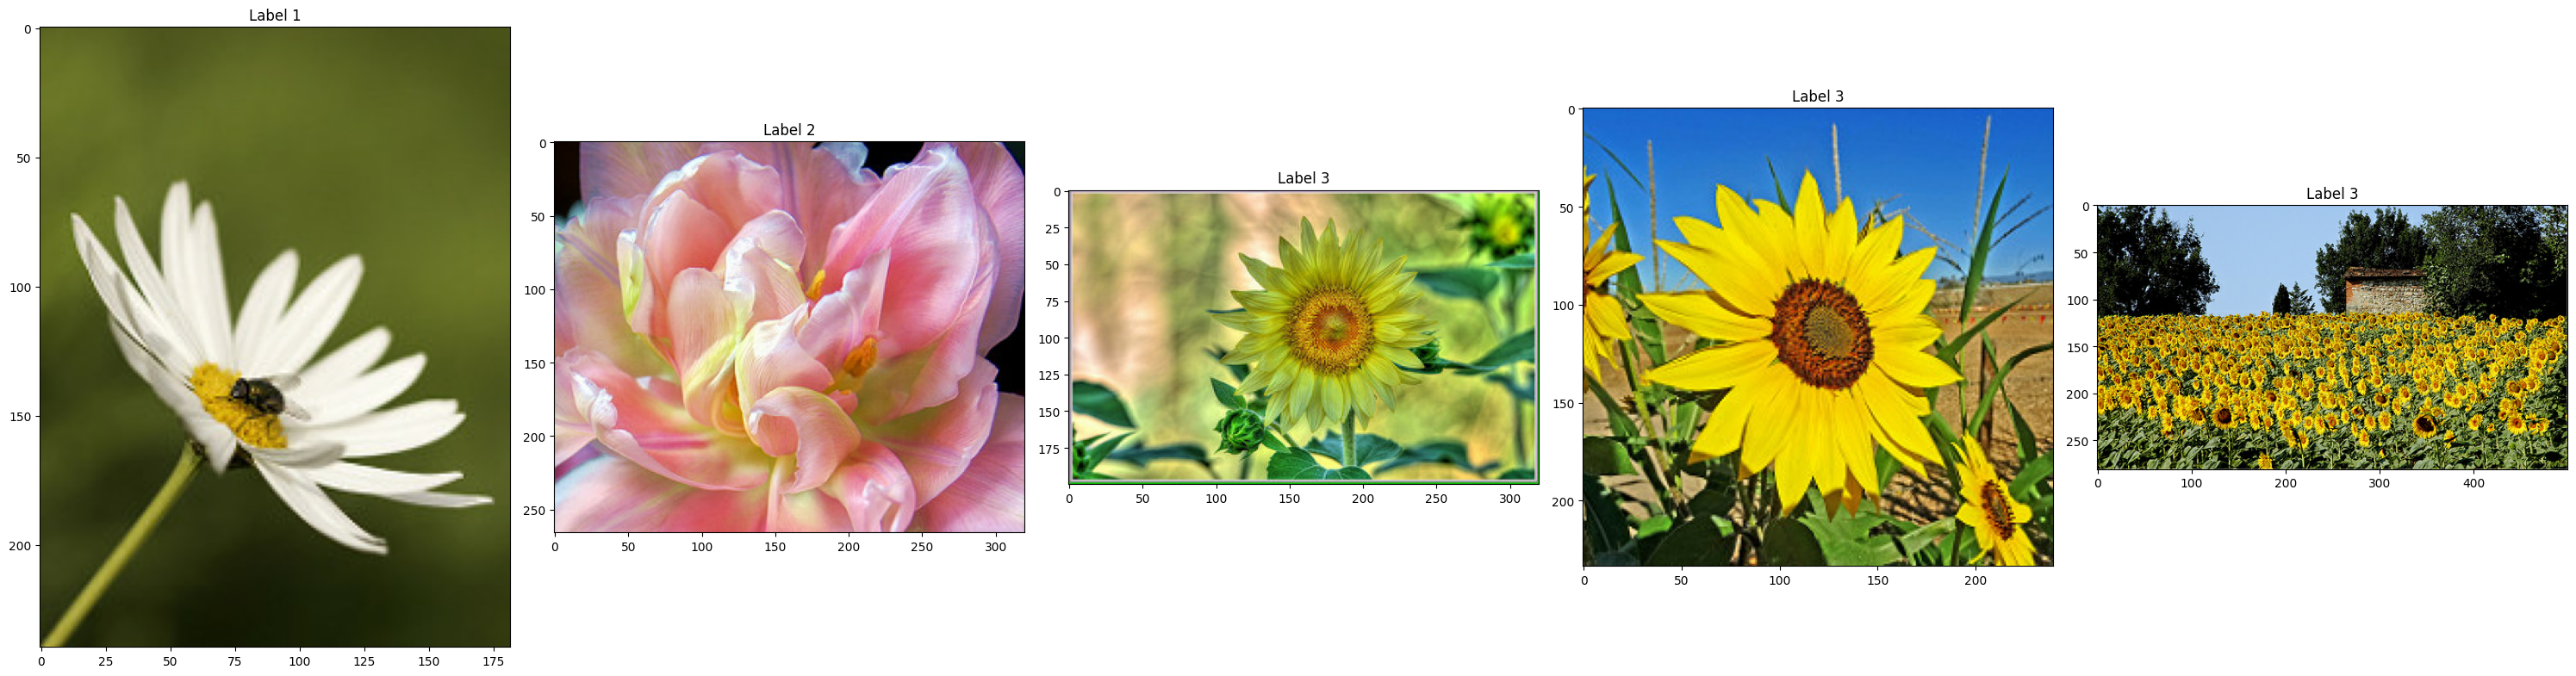

In [ ]:
#visualize some of the images in the dataset

i = 0
plt.rcParams["figure.figsize"] = [30, 15]
plt.rcParams["figure.autolayout"] = True

for image, label in train_set:
    image = image.numpy()
    plt.subplot(1, 5, i+1)
    plt.title('Label {}'.format(label))
    plt.imshow(image, cmap=plt.cm.binary)
    i += 1
    if i == 5:
        break

plt.show()


Observation : From above the different images  have the different sizes. We can verify this by printing the sizes of the images we visualized just now.

In [ ]:
for i, example in enumerate(train_set.take(5)):
    shape = example[0].shape
    print("Image %d -> shape: (%d, %d) label: %d" %
          (i, shape[0], shape[1], example[1]))


Image 0 -> shape: (333, 500) label: 2
Image 1 -> shape: (212, 320) label: 3
Image 2 -> shape: (240, 320) label: 3
Image 3 -> shape: (240, 320) label: 4
Image 4 -> shape: (317, 500) label: 3


In [ ]:
# Need to have all the images with same size to feed into a machine learning model.
# So we need to resize all the images to a fixed size which is 224.
# and alos Need to normalize the images so that the value of each pixel comes in the range 0 to 1
IMAGE_SIZE = 224

def resize_image(image, label):
    image = tf.image.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
    # Normalisation
    image = image/255.0
    return image, label

batch_size = 32
train_set = train_set.shuffle(300).map(resize_image).batch(batch_size).prefetch(1)
test_set = test_set.map(resize_image).batch(batch_size).prefetch(1)

print(train_set)
print(test_set)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [ ]:
#tfds.as_dataframe(ds.take(4), info)

In [ ]:
#fig = tfds.show_examples(train_set, info)

In [ ]:
#ds1 = ds.take(1)  # Only take a single example

#for example in ds1:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
 # print(list(example.keys()))
  #image = example["image"]
  #label = example["label"]
  #print(image.shape, label)

In [ ]:
info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=5),
})

In [ ]:
print(info.features['label'].names)

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']


In [ ]:
# end of using tfds

## 2.1 Write your observations from the above.

1. Size of the dataset
2. What type of data attributes are there?
3. What are you classifying?
4. Plot the distribution of the categories of the target / label.



# 3. Data Preparation -- Score: 1 Mark

Perform the data prepracessing that is required for the data that you have downloaded.


This stage depends on the dataset that is used.

## 3.1 Apply pre-processing techiniques

* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies
* Encode categorical data
* Normalize the data
* Feature Engineering
* Stop word removal, lemmatiation, stemming, vectorization


IF ANY

In [ ]:
##---------Type the code below this line------------------##

## 3.2 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.





In [ ]:
##---------Type the code below this line------------------##

## 3.3 Split the data into training set and testing set

In [ ]:
##---------Type the code below this line------------------##

## 3.4 Preprocessing report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present
* to impute or remove missing data, if present
* to remove data inconsistencies, if present
* to encode categorical data
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset


In [ ]:
##---------Type the answer below this line------------------##

# 4. Deep Neural Network Architecture - Score:  Marks


## 4.1 Design the architecture that you will be using

* Sequential Model Building with Activation for each layer.
* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.
* Use Relu Activation function in each hidden layer
* Use Sigmoid / softmax Activation function in the output layer as required

DO NOT USE CNN OR RNN.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
#model = Sequential()
#model.add(Dense(12, input_dim=8, activation="relu"))
#model.add(Dense(12, activation="relu"))
#model.add(Dense(1, activation="sigmoid"))

In [ ]:
#Building the ML Model
input_layer = tf.keras.layers.Input([224,224,3])
print("...................",input_layer.shape)
model1 = Sequential()
#flatten function flattens the multi-dimensional input tensors into a single dimension, so you can model your input layer and build your neural network model,
#then pass those data into every single neuron of the model effectively
model1.add(Flatten(input_shape=(224,224,3)))
model1.add(Dense(512, activation='relu'))
model1.add(Dense(512, activation='relu'))
model1.add(Dense(512, activation='relu'))
model1.add(Dense(5, activation='softmax'))


................... (None, 224, 224, 3)


In [ ]:
##---------Type the code below this line------------------##

## 4.2 DNN Report

Report the following and provide justification for the same.



* Number of layers
* Number of units in each layer
* Total number of trainable parameters



In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 512)               77070848  
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 77,598,725
Trainable params: 77,598,725
Non-trainable params: 0
_________________________________________________________________


In [ ]:
##---------Type the answer below this line------------------##

# 5. Training the model - Score: 1 Mark


## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations

Compile with categorical CE loss and metric accuracy.

In [ ]:
#Congiguring the model with appropriate optimizers and regularizations
input_layer = tf.keras.layers.Input([224,224,3])
print("...................",input_layer.shape)
#opti_sgd = tf.keras.optimizers.SGD(learning_rate=1e-3)
model1 = Sequential()
#flatten function flattens the multi-dimensional input tensors into a single dimension, so you can model your input layer and build your neural network model,
#then pass those data into every single neuron of the model effectively
model1.add(Flatten(input_shape=(224,224,3)))
model1.add(Dense(512, activation='relu',kernel_regularizer=None,activity_regularizer=tf.keras.regularizers.L1(0.3),bias_regularizer=None))
model1.add(Dense(512, activation='relu',kernel_regularizer=None,activity_regularizer=tf.keras.regularizers.L1(0.3),bias_regularizer=None))
model1.add(Dense(512, activation='relu',kernel_regularizer=None,activity_regularizer=tf.keras.regularizers.L1(0.3),bias_regularizer=None))
model1.add(Dense(5, activation='softmax'))

................... (None, 224, 224, 3)


In [ ]:
#Configuring the model for optimizers
model1.compile(optimizer= tf.keras.optimizers.SGD(learning_rate=1e-3), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
##---------Type the code below this line------------------##

## 5.2 Train the model

Train Model with cross validation, with total time taken shown for 20 epochs.

Use SGD.

In [ ]:
train_par1=model1.fit(train_set,batch_size =32, epochs=20, validation_data=test_set,validation_split=0.2,shuffle=True)

Epoch 1/20
92/92 [==============================] - 7s 72ms/step - loss: 0.7515 - accuracy: 0.7425 - val_loss: 1.3747 - val_accuracy: 0.4891
Epoch 2/20
92/92 [==============================] - 6s 59ms/step - loss: 0.7358 - accuracy: 0.7517 - val_loss: 1.3063 - val_accuracy: 0.4796
Epoch 3/20
92/92 [==============================] - 7s 72ms/step - loss: 0.7134 - accuracy: 0.7629 - val_loss: 1.3969 - val_accuracy: 0.4687
Epoch 4/20
92/92 [==============================] - 6s 60ms/step - loss: 0.7271 - accuracy: 0.7405 - val_loss: 1.3216 - val_accuracy: 0.4755
Epoch 5/20
92/92 [==============================] - 7s 72ms/step - loss: 0.6710 - accuracy: 0.7810 - val_loss: 1.2941 - val_accuracy: 0.5177
Epoch 6/20
92/92 [==============================] - 6s 61ms/step - loss: 0.6334 - accuracy: 0.8059 - val_loss: 1.2346 - val_accuracy: 0.4850
Epoch 7/20
92/92 [==============================] - 7s 72ms/step - loss: 0.6301 - accuracy: 0.7994 - val_loss: 1.1568 - val_accuracy: 0.5191
Epoch 8/20
92

In [ ]:
##---------Type the code below this line------------------##

Justify your choice of optimizers and regulizations used and the hyperparameters tuned


In [ ]:
##---------Type the answers below this line------------------##

# 6. Test the model - 0.5 marks


In [ ]:
model1.evaluate(test_set,verbose = 1)

23/23 [==============================] - 0s 19ms/step - loss: 1.5032 - accuracy: 0.4496


[1.50315523147583, 0.4495912790298462]

In [ ]:
model1.evaluate(train_set,verbose = 1)

92/92 [==============================] - 6s 63ms/step - loss: 0.5366 - accuracy: 0.8246


[0.5366179943084717, 0.8245912790298462]

In [ ]:
##---------Type the code below this line------------------##

# 7. Intermediate result  - Score: 1 mark

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history.
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


In [ ]:
##---------Type the code below this line------------------##

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


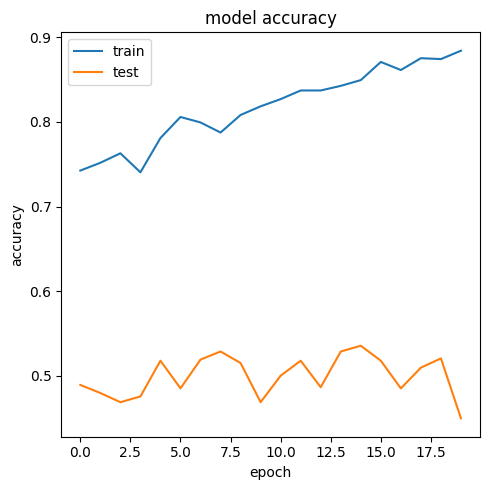

In [ ]:
# list all data in history
print(train_par1.history.keys())
# summarize history for accuracy
plt.figure(figsize=(5,5))
plt.plot(train_par1.history['accuracy'])
plt.plot(train_par1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

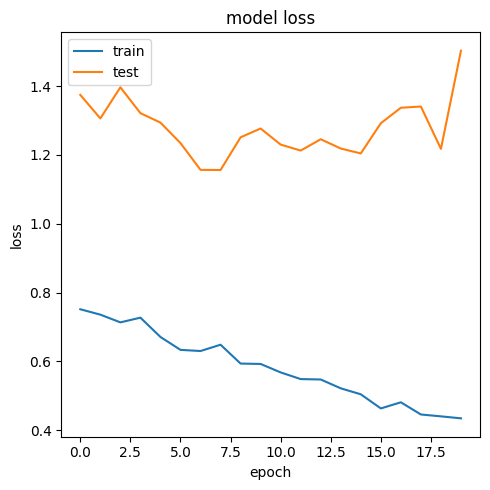

In [ ]:
# summarize history for loss
plt.figure(figsize=(5,5))
plt.plot(train_par1.history['loss'])
plt.plot(train_par1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 8. Model architecture - Score: 1 mark


Modify the architecture designed in section 4.1

1. by decreasing one layer
2. by increasing one layer

For example, if the architecture in 4.1 has 5 layers, then 8.1 should have 4 layers and 8.2 should have 6 layers.

Plot the comparison of the training and validation accuracy of the three architecures (4.1, 8.1 and 8.2)



# 1> Decreasing one layer

In [ ]:
#Building the ML Model
input_layer = tf.keras.layers.Input([224,224,3])
print("...................",input_layer.shape)
model2 = Sequential()
#flatten function flattens the multi-dimensional input tensors into a single dimension, so you can model your input layer and build your neural network model,
#then pass those data into every single neuron of the model effectively
model2.add(Flatten(input_shape=(224,224,3)))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(512, activation='relu'))
#model2.add(Dense(512, activation='relu')) # Removing this layer to  Decrease
model2.add(Dense(5, activation='softmax'))
model2.summary()

................... (None, 224, 224, 3)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 512)               77070848  
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dense_6 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 77,336,069
Trainable params: 77,336,069
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Configuring the model for optimizers
# lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-2,
#     decay_steps=10000,
#     decay_rate=0.9)
# optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)

model2.compile(optimizer= tf.keras.optimizers.SGD(learning_rate=1e-3), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#Training the model
train_par2 = model2.fit(train_set,batch_size =32, epochs=20, validation_data=test_set,validation_split=0.2,shuffle=True)

Epoch 1/20
92/92 [==============================] - 6s 59ms/step - loss: 1.4577 - accuracy: 0.3593 - val_loss: 1.3891 - val_accuracy: 0.3951
Epoch 2/20
92/92 [==============================] - 7s 71ms/step - loss: 1.2984 - accuracy: 0.4520 - val_loss: 1.3382 - val_accuracy: 0.4223
Epoch 3/20
92/92 [==============================] - 6s 61ms/step - loss: 1.2193 - accuracy: 0.4942 - val_loss: 1.3562 - val_accuracy: 0.4223
Epoch 4/20
92/92 [==============================] - 7s 73ms/step - loss: 1.1650 - accuracy: 0.5116 - val_loss: 1.2501 - val_accuracy: 0.4591
Epoch 5/20
92/92 [==============================] - 6s 58ms/step - loss: 1.1285 - accuracy: 0.5344 - val_loss: 1.3212 - val_accuracy: 0.4455
Epoch 6/20
92/92 [==============================] - 6s 59ms/step - loss: 1.0851 - accuracy: 0.5688 - val_loss: 1.2241 - val_accuracy: 0.4823
Epoch 7/20
92/92 [==============================] - 7s 71ms/step - loss: 1.0520 - accuracy: 0.5886 - val_loss: 1.1931 - val_accuracy: 0.4918
Epoch 8/20
92

In [ ]:
#Testing the Model
model2.evaluate(test_set,verbose = 1)

23/23 [==============================] - 1s 22ms/step - loss: 1.2337 - accuracy: 0.5123


[1.2337075471878052, 0.5122615694999695]

In [ ]:
#2> Increasing one layer

In [ ]:
#Building the ML Model
input_layer = tf.keras.layers.Input([224,224,3])
print("...................",input_layer.shape)
model3 = Sequential()
#flatten function flattens the multi-dimensional input tensors into a single dimension, so you can model your input layer and build your neural network model,
#then pass those data into every single neuron of the model effectively
model3.add(Flatten(input_shape=(224,224,3)))
model3.add(Dense(512, activation='relu'))
model3.add(Dense(512, activation='relu'))
model3.add(Dense(512, activation='relu'))
model3.add(Dense(512, activation='relu')) #Adding one addiitonal layer
model3.add(Dense(5, activation='softmax'))
model3.summary()

................... (None, 224, 224, 3)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_7 (Dense)             (None, 512)               77070848  
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dense_11 (Dense)            (None, 5)                 2565      
                                                                 
Total params: 

In [ ]:
#Configuring the model for optimizers
model3.compile(optimizer= tf.keras.optimizers.SGD(learning_rate=1e-3), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#Training the model
train_par3 = model3.fit(train_set,batch_size =32, epochs=20, validation_data=test_set ,validation_split=0.2,shuffle=True )

Epoch 1/20
92/92 [==============================] - 8s 71ms/step - loss: 1.4837 - accuracy: 0.3474 - val_loss: 1.4230 - val_accuracy: 0.3978
Epoch 2/20
92/92 [==============================] - 6s 61ms/step - loss: 1.3250 - accuracy: 0.4288 - val_loss: 1.3130 - val_accuracy: 0.4673
Epoch 3/20
92/92 [==============================] - 6s 61ms/step - loss: 1.2613 - accuracy: 0.4574 - val_loss: 1.3712 - val_accuracy: 0.4046
Epoch 4/20
92/92 [==============================] - 6s 60ms/step - loss: 1.2204 - accuracy: 0.4717 - val_loss: 1.2305 - val_accuracy: 0.4850
Epoch 5/20
92/92 [==============================] - 7s 72ms/step - loss: 1.1837 - accuracy: 0.5177 - val_loss: 1.2195 - val_accuracy: 0.5000
Epoch 6/20
92/92 [==============================] - 6s 59ms/step - loss: 1.1465 - accuracy: 0.5225 - val_loss: 1.3353 - val_accuracy: 0.4223
Epoch 7/20
92/92 [==============================] - 7s 71ms/step - loss: 1.1248 - accuracy: 0.5341 - val_loss: 1.2812 - val_accuracy: 0.4537
Epoch 8/20
92

In [ ]:
#Testing the Model
model3.evaluate(test_set,verbose = 1)

23/23 [==============================] - 0s 19ms/step - loss: 1.2184 - accuracy: 0.5014


[1.2184133529663086, 0.5013623833656311]

In [ ]:
#3>Compariison of all the three architectures

In [ ]:
##---------Type the code below this line------------------##

# 9. Regularisations - Score: 1 mark

Modify the architecture designed in section 4.1

1. Dropout of ratio 0.25
2. Dropout of ratio 0.25 with L2 regulariser with factor 1e−04.

Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)



In [ ]:
#1>Dropout of ration 0.25
#Building the ML Model
input_layer = tf.keras.layers.Input([224,224,3])
print("...................",input_layer.shape)
model4 = Sequential()
#flatten function flattens the multi-dimensional input tensors into a single dimension, so you can model your input layer and build your neural network model,
#then pass those data into every single neuron of the model effectively
model4.add(Flatten(input_shape=(224,224,3)))
model4.add(Dense(512, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(512, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(512, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(5, activation='softmax'))
model4.summary()

................... (None, 224, 224, 3)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_12 (Dense)            (None, 512)               77070848  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 512)               262656    
                                                                 
 dropout_2 (Dr

In [ ]:
model4.compile(optimizer= tf.keras.optimizers.SGD(learning_rate=1e-3), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
train_par4 = model4.fit(train_set,batch_size =32, epochs=20, validation_data=test_set ,validation_split=0.2,shuffle=True )

Epoch 1/20
92/92 [==============================] - 10s 78ms/step - loss: 1.5378 - accuracy: 0.3127 - val_loss: 1.4071 - val_accuracy: 0.3965
Epoch 2/20
92/92 [==============================] - 6s 67ms/step - loss: 1.4102 - accuracy: 0.3893 - val_loss: 1.3369 - val_accuracy: 0.4264
Epoch 3/20
92/92 [==============================] - 6s 62ms/step - loss: 1.3469 - accuracy: 0.4142 - val_loss: 1.3033 - val_accuracy: 0.4210
Epoch 4/20
92/92 [==============================] - 6s 66ms/step - loss: 1.3229 - accuracy: 0.4309 - val_loss: 1.2628 - val_accuracy: 0.4632
Epoch 5/20
92/92 [==============================] - 6s 60ms/step - loss: 1.2810 - accuracy: 0.4469 - val_loss: 1.2583 - val_accuracy: 0.4768
Epoch 6/20
92/92 [==============================] - 7s 73ms/step - loss: 1.2554 - accuracy: 0.4584 - val_loss: 1.2514 - val_accuracy: 0.4728
Epoch 7/20
92/92 [==============================] - 6s 60ms/step - loss: 1.2469 - accuracy: 0.4683 - val_loss: 1.2613 - val_accuracy: 0.4591
Epoch 8/20
9

In [ ]:
model4.evaluate(test_set,verbose = 1)

23/23 [==============================] - 2s 68ms/step - loss: 1.1845 - accuracy: 0.5095


[1.184480905532837, 0.5095368027687073]

In [ ]:
#2>Dropout of ratio 0.25 with L2 regulariser with factor 1e−04.
#1>Dropout of ration 0.25
#Building the ML Model
input_layer = tf.keras.layers.Input([224,224,3])
print("...................",input_layer.shape)
model5 = Sequential()
#flatten function flattens the multi-dimensional input tensors into a single dimension, so you can model your input layer and build your neural network model,
#then pass those data into every single neuron of the model effectively
model5.add(Flatten(input_shape=(224,224,3)))
model5.add(Dense(512, activation='relu',kernel_regularizer=None,activity_regularizer=tf.keras.regularizers.L2(1e-04),bias_regularizer=None))
model5.add(Dropout(0.25))
model5.add(Dense(512, activation='relu',kernel_regularizer=None,activity_regularizer=tf.keras.regularizers.L2(1e-04),bias_regularizer=None))
model5.add(Dropout(0.25))
model5.add(Dense(512, activation='relu',kernel_regularizer=None,activity_regularizer=tf.keras.regularizers.L2(1e-04),bias_regularizer=None))
model5.add(Dropout(0.25))
model5.add(Dense(5, activation='softmax'))
model5.summary()

................... (None, 224, 224, 3)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 150528)            0         
                                                                 
 dense_20 (Dense)            (None, 512)               77070848  
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 512)               262656    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_22 (Dense)            (None, 512)               262656    
                                                                 
 dropout_8 (Dr

In [ ]:
model5.compile(optimizer= tf.keras.optimizers.SGD(learning_rate=1e-3), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
train_par5 = model5.fit(train_set,batch_size =32, epochs=20, validation_data=test_set ,validation_split=0.2,shuffle=True )

Epoch 1/20
92/92 [==============================] - 12s 102ms/step - loss: 1.5788 - accuracy: 0.3011 - val_loss: 1.4719 - val_accuracy: 0.3856
Epoch 2/20
92/92 [==============================] - 6s 64ms/step - loss: 1.4673 - accuracy: 0.3815 - val_loss: 1.4042 - val_accuracy: 0.4074
Epoch 3/20
92/92 [==============================] - 7s 66ms/step - loss: 1.4111 - accuracy: 0.4053 - val_loss: 1.3749 - val_accuracy: 0.4060
Epoch 4/20
92/92 [==============================] - 7s 73ms/step - loss: 1.3730 - accuracy: 0.4196 - val_loss: 1.3253 - val_accuracy: 0.4387
Epoch 5/20
92/92 [==============================] - 7s 72ms/step - loss: 1.3254 - accuracy: 0.4418 - val_loss: 1.3398 - val_accuracy: 0.4210
Epoch 6/20
92/92 [==============================] - 6s 60ms/step - loss: 1.3108 - accuracy: 0.4544 - val_loss: 1.2916 - val_accuracy: 0.4591
Epoch 7/20
92/92 [==============================] - 7s 72ms/step - loss: 1.2957 - accuracy: 0.4499 - val_loss: 1.2720 - val_accuracy: 0.4809
Epoch 8/20


In [ ]:
#3>Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)

In [ ]:
##---------Type the code below this line------------------##

# 10. Optimisers -Score: 1 mark

Modify the code written in section 5.2

1. RMSProp with your choice of hyper parameters
2. Adam with your choice of hyper parameters

Plot the comparison of the training and validation accuracy of the three (5.2, 10.1 and 10.2)


In [ ]:
##---------Type the code below this line------------------##

In [ ]:
#Congiguring the model with appropriate optimizers and regularizations
input_layer = tf.keras.layers.Input([224,224,3])
print("...................",input_layer.shape)
#opti_sgd = tf.keras.optimizers.SGD(learning_rate=1e-3)
model6 = Sequential()
#flatten function flattens the multi-dimensional input tensors into a single dimension, so you can model your input layer and build your neural network model,
#then pass those data into every single neuron of the model effectively
model6.add(Flatten(input_shape=(224,224,3)))
model6.add(Dense(512, activation='relu',kernel_regularizer=None,activity_regularizer=tf.keras.regularizers.L1(0.3),bias_regularizer=None))
model6.add(Dense(512, activation='relu',kernel_regularizer=None,activity_regularizer=tf.keras.regularizers.L1(0.3),bias_regularizer=None))
model6.add(Dense(512, activation='relu',kernel_regularizer=None,activity_regularizer=tf.keras.regularizers.L1(0.3),bias_regularizer=None))
model6.add(Dense(5, activation='softmax'))

................... (None, 224, 224, 3)


In [ ]:
model6.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model6.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# 11. Conclusion - Score: 1 mark

Comparing the sections 4.1, 5.2, 8, 9, and 10, present your observations on which model or architecture or regualiser or optimiser perfomed better.


In [ ]:
##---------Type the code below this line------------------##

### NOTE


All Late Submissions will incur a <b>penalty of -2 marks </b>. So submit your assignments on time.

Good Luck

In [ ]:
# test changes